# Text Mining and Search Project

**Martina Pantò - 901346**

**Alessandro Bosi - 837381**

Dialogue Lines from all 27 seasons of The Simpsons

This dataset contains the characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989. More than 150k lines of dialogues with the text spoken during each episode and who said it.

# Dataset upload

In [ ]:
# kaggle link to download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pierremegret/dialogue-lines-of-the-simpsons")

print("Path to dataset files:", path)

KeyboardInterrupt: 

In [ ]:
import pandas as pd

In [ ]:
# to import data
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/TextMiningProject/simpsons_dataset.csv")
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
158309,Miss Hoover,I'm back.
158310,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
158311,Miss Hoover,Psy-cho-so-ma-tic.
158312,Ralph Wiggum,Does that mean you were crazy?


In [ ]:
df.head(100)

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
95,Homer Simpson,Think nothing of it.
96,Homer Simpson,"Hey, what's the matter, son?"
97,Bart Simpson,"Ah, Dad, if just me, Milhouse and Lewis had vo..."
98,Homer Simpson,"Hey son, would you have gotten any money for b..."


# Libraries

In [ ]:
from matplotlib import pyplot as plt
import nltk
import numpy as np
import re

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
words_to_keep = {'no', 'not', 'never', 'but', 'so'} # in a dialogue it's important to express negation, contradiction or consequence
stop_words = stop_words - words_to_keep

from textblob import TextBlob
from wordcloud import WordCloud

from IPython.display import display

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Libraries for Progress check
from rich.progress import Progress, BarColumn, TextColumn, TimeRemainingColumn
from tqdm.rich import tqdm
import time
from tqdm.notebook import tqdm
tqdm.pandas()

bar_color = "#fdda24" # Yellow colour

# Generic function with customized bar
def progress_apply(df, func, column, new_column, description="Applying", color=bar_color, bar_width=50):
    results = []
    with Progress(
        TextColumn(f"[bold]{description}:[/bold]"),
        BarColumn(bar_width=bar_width, complete_style=color),
        "[progress.percentage]{task.percentage:>3.0f}%",
        TimeRemainingColumn(),
    ) as progress:
        task = progress.add_task(description, total=len(df))
        for value in df[column]:
            results.append(func(value))
            progress.update(task, advance=1)
    df[new_column] = results
    return df

# Preliminary analysis

In [ ]:
print("Shape:")
display(pd.DataFrame({'Rows': [df.shape[0]], 'Columns': [df.shape[1]]}))

print("\nColumns:")
display(pd.DataFrame(df.columns, columns=["Column Names"]))

print("\nDescribe columns:")
display(df.describe(include='all').transpose())

print("\nSample:")
display(df.sample(5))

Shape:


,Rows,Columns
0,158314,2



Columns:


,Column Names
0,raw_character_text
1,spoken_words



Describe columns:


,count,unique,top,freq
raw_character_text,140500,6758,Homer Simpson,29782
spoken_words,131855,121759,No.,304



Sample:


,raw_character_text,spoken_words
116824,Lenny Leonard,Sir -- I'm afraid it's too late.
146899,Marge Simpson,Oh Lord.
60117,Instructor,It's okay. That's what the diapers are for.
82737,Marge Simpson,"To overturn these horrible anti-family laws, w..."
21565,NaN,NaN


In [ ]:
# Rename the column raw_character_text
df = df.rename(columns = {'raw_character_text':'character'})
df

,character,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
158309,Miss Hoover,I'm back.
158310,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
158311,Miss Hoover,Psy-cho-so-ma-tic.
158312,Ralph Wiggum,Does that mean you were crazy?


# Preprocessing

In [ ]:
# Dialogue Segmentation
# Create a column 'dialogue_index' to assign a number to each dialogue, between empty lines
dialogue_index = 1  # Start with arbitrary number
df['dialogue_index'] = None  # Initialize the column

# Go through the df to assign the number
for i, row in df.iterrows():
    if pd.isna(row['character']) and pd.isna(row['spoken_words']):
        dialogue_index += 1
    else:
        df.at[i, 'dialogue_index'] = dialogue_index

# Dropping NaNs
df_full = df.dropna(subset=['character', 'spoken_words']).reset_index(drop=True)
df_full.head(10)

,character,spoken_words,dialogue_index
0,Miss Hoover,"No, actually, it was a little of both. Sometim...",1
1,Lisa Simpson,Where's Mr. Bergstrom?,1
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,1
3,Lisa Simpson,That life is worth living.,1
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,1
5,Martin Prince,I don't think there's anything left to say.,1
6,Edna Krabappel-Flanders,Bart?,1
7,Bart Simpson,Victory party under the slide!,1
8,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,2
9,Landlady,"Hey, hey, he Moved out this morning. He must h...",2


In [ ]:
# Null values for 'spoken_words' column
print("Empty spoken_words in df:",df['spoken_words'].isna().sum())
print("Empty spoken_words in df_full:",df_full['spoken_words'].isna().sum())

# Null values for 'character' column
print("\nEmpty character in df:",df['character'].isna().sum())
print("Empty character in df_full:",df_full['character'].isna().sum())

Empty spoken_words in df: 26459
Empty spoken_words in df_full: 0

Empty character in df: 17814
Empty character in df_full: 0


In [ ]:
# Character Normalization (for clustering)
df_full['character_normalized'] = df_full['character'].str.lower().str.strip().astype(str).str.replace(' ', '_')

df_full['character_normalized'] = (df_full['character'].astype(str).str.lower().str.strip()
    .apply(lambda x: re.sub(r'[^\w\s]', '', x))        # Remove punctuation
    .apply(lambda x: re.sub(r'\s+', ' ', x))           # Normalize whitespace
    .str.replace(' ', '_')                             # Replace space with underscore
    .str.strip('_')                                    # Remove leading underscores
)

In [ ]:
# Text Normalization
def normalize_text(text):
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_full['normalized_text'] = df_full['spoken_words'].apply(normalize_text)

# Tokenization
df_full['tokens'] = df_full['normalized_text'].apply(word_tokenize)

In [ ]:
# Normalization and removal of stop words
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return " ".join([word for word in text.split() if word not in stop_words])

df_full["clean_text"] = df_full["spoken_words"].astype(str).apply(clean_text)

# Tokens without stop words
df_full['clean_tokens'] = df_full['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization/Stemming
lemmatizer = WordNetLemmatizer()
df_full['lemmatized_tokens'] = df_full['clean_tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [ ]:
# Joining back the tokens
df_full['final_text'] = df_full['lemmatized_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
df_full.head(100)

,character,spoken_words,dialogue_index,character_normalized,normalized_text,tokens,clean_text,clean_tokens,lemmatized_tokens,final_text
0,Miss Hoover,"No, actually, it was a little of both. Sometim...",1,miss_hoover,no actually it was a little of both sometimes ...,"[no, actually, it, was, a, little, of, both, s...",no actually little sometimes disease magazines...,"[no, actually, little, sometimes, disease, mag...","[no, actually, little, sometimes, disease, mag...",no actually little sometimes disease magazine ...
1,Lisa Simpson,Where's Mr. Bergstrom?,1,lisa_simpson,wheres mr bergstrom,"[wheres, mr, bergstrom]",wheres mr bergstrom,"[wheres, mr, bergstrom]","[wheres, mr, bergstrom]",wheres mr bergstrom
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,1,miss_hoover,i dont know although id sure like to talk to h...,"[i, dont, know, although, id, sure, like, to, ...",dont know although id sure like talk didnt tou...,"[dont, know, although, id, sure, like, talk, d...","[dont, know, although, id, sure, like, talk, d...",dont know although id sure like talk didnt tou...
3,Lisa Simpson,That life is worth living.,1,lisa_simpson,that life is worth living,"[that, life, is, worth, living]",life worth living,"[life, worth, living]","[life, worth, living]",life worth living
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,1,edna_krabappelflanders,the polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,...",polls open end recess case decided put thought...,"[polls, open, end, recess, case, decided, put,...","[poll, open, end, recess, case, decided, put, ...",poll open end recess case decided put thought ...
...,...,...,...,...,...,...,...,...,...,...
95,Homer Simpson,And is this Martin guy going to get to do anyt...,6,homer_simpson,and is this martin guy going to get to do anyt...,"[and, is, this, martin, guy, going, to, get, t...",martin guy going get anything neat like throw ...,"[martin, guy, going, get, anything, neat, like...","[martin, guy, going, get, anything, neat, like...",martin guy going get anything neat like throw ...
96,Bart Simpson,"Well, no.",6,bart_simpson,well no,"[well, no]",well no,"[well, no]","[well, no]",well no
97,Homer Simpson,"So, let the baby have his bottle, huh? That's ...",6,homer_simpson,so let the baby have his bottle huh thats my m...,"[so, let, the, baby, have, his, bottle, huh, t...",so let baby bottle huh thats motto,"[so, let, baby, bottle, huh, thats, motto]","[so, let, baby, bottle, huh, thats, motto]",so let baby bottle huh thats motto
98,Bart Simpson,"Hey! Thanks, monkey-man.",6,bart_simpson,hey thanks monkeyman,"[hey, thanks, monkeyman]",hey thanks monkeyman,"[hey, thanks, monkeyman]","[hey, thanks, monkeyman]",hey thanks monkeyman


# Dataset saving to csv

In [1]:
df_full.to_csv("/content/gdrive/MyDrive/TextMiningProject/df_preprocessed.csv", index=False)

# Exploratory Data Analysis

In [ ]:
df_eda = df_full.copy()
df_eda = df_eda[['character','character_normalized','spoken_words','normalized_text','final_text']]
df_eda

,character,character_normalized,spoken_words,normalized_text,final_text
0,Miss Hoover,miss_hoover,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,no actually little sometimes disease magazine ...
1,Lisa Simpson,lisa_simpson,Where's Mr. Bergstrom?,wheres mr bergstrom,wheres mr bergstrom
2,Miss Hoover,miss_hoover,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,dont know although id sure like talk didnt tou...
3,Lisa Simpson,lisa_simpson,That life is worth living.,that life is worth living,life worth living
4,Edna Krabappel-Flanders,edna_krabappelflanders,The polls will be open from now until the end ...,the polls will be open from now until the end ...,poll open end recess case decided put thought ...
...,...,...,...,...,...
131848,Miss Hoover,miss_hoover,I'm back.,im back,im back
131849,Miss Hoover,miss_hoover,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,see class lyme disease turned
131850,Miss Hoover,miss_hoover,Psy-cho-so-ma-tic.,psychosomatic,psychosomatic
131851,Ralph Wiggum,ralph_wiggum,Does that mean you were crazy?,does that mean you were crazy,mean crazy


In [ ]:
# Add the word_count column
df_eda['word_count'] = df_eda['spoken_words'].apply(lambda x: len(x.split()))
# Add the letter_count column
df_eda['letter_count'] = df_eda['spoken_words'].apply(lambda x: sum(len(word) for word in x.split()))

df_eda.drop(columns=['character_normalized','normalized_text','final_text']).head(10)

,character,spoken_words,word_count,letter_count
0,Miss Hoover,"No, actually, it was a little of both. Sometim...",31,127
1,Lisa Simpson,Where's Mr. Bergstrom?,3,20
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,22,86
3,Lisa Simpson,That life is worth living.,5,22
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,33,137
5,Martin Prince,I don't think there's anything left to say.,8,36
6,Edna Krabappel-Flanders,Bart?,1,5
7,Bart Simpson,Victory party under the slide!,5,26
8,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,4,26
9,Landlady,"Hey, hey, he Moved out this morning. He must h...",19,76


### Sentiment Analysis

In [ ]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

df_eda["sentiment"] = df_eda["final_text"].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])
df_eda.groupby('character_normalized')["sentiment"].mean().sort_values(ascending=False).head(10)

,sentiment
character_normalized,
ice_dancers,0.9904
abba,0.9861
indian_woman,0.9849
applicants,0.9744
jinglers,0.9705
kount,0.9705
cyndi_lauper,0.9657
gangstersmolls,0.9584
crew,0.9531


In [ ]:
def count_laughs(text): # Humor Detection with Keyword Search
    return len(re.findall(r"\b(ha|haha|lol|lmao)\b", text.lower()))

def sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity
# 1= positive conversation, -1 = negative conversation --> sentiment_polarity=indicator of the mood of the conversation

def sentiment_subjectivity(text):
    return TextBlob(text).sentiment.polarity
# 0 = frase oggettiva, 1 = frase soggettiva

# Main function that applies all the sentiment features with progress bar
def apply_sentiment_features(df, text_column='spoken_words'):

    df = progress_apply(df, count_laughs,           text_column, 'count_laughs',           "Count Laughs           ", color="#fdda24", bar_width=50)
    df = progress_apply(df, sentiment_polarity,     text_column, 'sentiment_polarity',     "Sentiment Polarity     ", color="#fdda24", bar_width=50)
    df = progress_apply(df, sentiment_subjectivity, text_column, 'sentiment_subjectivity', "Sentiment Subjectivity ", color="#fdda24", bar_width=50)

    print("\n Done!\n")
    return df

In [ ]:
df_eda = apply_sentiment_features(df_eda)

Output()

Output()

Output()


 Done!



In [ ]:
df_eda

,character,character_normalized,spoken_words,normalized_text,final_text,word_count,letter_count,sentiment,count_laughs,sentiment_polarity,sentiment_subjectivity
0,Miss Hoover,miss_hoover,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,no actually little sometimes disease magazine ...,31,127,0.0772,0,-0.021875,-0.021875
1,Lisa Simpson,lisa_simpson,Where's Mr. Bergstrom?,wheres mr bergstrom,wheres mr bergstrom,3,20,0.0000,0,0.000000,0.000000
2,Miss Hoover,miss_hoover,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,dont know although id sure like talk didnt tou...,22,86,0.5859,0,0.500000,0.500000
3,Lisa Simpson,lisa_simpson,That life is worth living.,that life is worth living,life worth living,5,22,0.2263,0,0.300000,0.300000
4,Edna Krabappel-Flanders,edna_krabappelflanders,The polls will be open from now until the end ...,the polls will be open from now until the end ...,poll open end recess case decided put thought ...,33,137,0.2732,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
131848,Miss Hoover,miss_hoover,I'm back.,im back,im back,2,8,0.0000,0,0.000000,0.000000
131849,Miss Hoover,miss_hoover,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,see class lyme disease turned,10,42,0.0000,0,0.000000,0.000000
131850,Miss Hoover,miss_hoover,Psy-cho-so-ma-tic.,psychosomatic,psychosomatic,1,18,0.0000,0,0.000000,0.000000
131851,Ralph Wiggum,ralph_wiggum,Does that mean you were crazy?,does that mean you were crazy,mean crazy,6,25,-0.3400,0,-0.456250,-0.456250


### Character Analysis

In [ ]:
# Group by 'character' and count occurrences of 'spoken_words'
character_counts = df_eda.groupby('character_normalized')['final_text'].count()

# Filter characters that have a count of 0
characters_with_zero_count = character_counts[character_counts == 0]
# Filter characters that have a count NOT 0
characters_with_nonzero_count = character_counts[character_counts != 0]
# Filter characters that have a count of 1
characters_with_one_count = character_counts[character_counts == 1]
# Filter characters that have a count <3
characters_with_leq3_count = character_counts[character_counts <= 3]
# Filter characters that have a count >10
characters_with_geq10_count = character_counts[character_counts >= 10]

# Print the count of characters with specific spoken word counts
print(f"Number of characters with 0 spoken words: {characters_with_zero_count.count()}")
print(f"Number of characters with non-zero spoken words: {characters_with_nonzero_count.count()}")
print(f"Number of characters with exactly 1 spoken word: {characters_with_one_count.count()}")
print(f"Number of characters with 3 or fewer spoken words: {characters_with_leq3_count.count()}")
print(f"Number of characters with 10 or more spoken words: {characters_with_geq10_count.count()}")

Number of characters with 0 spoken words: 0
Number of characters with non-zero spoken words: 6257
Number of characters with exactly 1 spoken word: 2784
Number of characters with 3 or fewer spoken words: 4436
Number of characters with 10 or more spoken words: 770


In [ ]:
# Top 10 characters who have spoken the most words
most_words = df_eda.groupby('character_normalized')['spoken_words'].count().sort_values(ascending=False).head(10)
print("Top 10 characters with the most spoken words:")
display(most_words)

Top 10 characters with the most spoken words:


,spoken_words
character_normalized,
homer_simpson,27850
marge_simpson,13172
bart_simpson,12995
lisa_simpson,10756
c_montgomery_burns,3077
moe_szyslak,2808
seymour_skinner,2385
ned_flanders,2056
grampa_simpson,1802


#### Character charts

In [ ]:
# List of characters
# character_list = df_eda['character_normalized'].unique().tolist()
# print("Number of characters:",len(character_list))
# character_list[:]

In [ ]:
# Color-character mapping
character_colors = {
    'homer_simpson': "#fdda24",   # yellow
    'marge_simpson': "#5c92d1",   # blu
    'bart_simpson': "#ff6f61",    # red
    'lisa_simpson': "#34a853",    # green
    'maggie_simpson': "#000000",  # black
    'ned_flanders': "#9e9e9e",    # gray
    'c_montgomery_burns': "#b0bec5",       # light blue
    'milhouse_van_ Houten': "#7e57c2",  # purple
    'moe_szyslak': "#795548",     # brown
    'chief_wiggum': "#607d8b" # dark gray
}

In [ ]:
# Function to find and display the top 10 characters with the most lines
def top_characters_by_lines(df):
    # Find the top 10 characters with the most lines
    top_characters = df['character_normalized'].value_counts().head(10)
    character_names = top_characters.index
    counts = top_characters.values

    colors = [character_colors.get(name, "#fdda24") for name in character_names]

    plt.figure(figsize=(14, 7))
    bars = plt.bar(character_names, counts, color=colors, edgecolor='black', linewidth=2)

    ax = plt.gca()
    ax.set_facecolor('#fff9d5')

    plt.title("Top Characters with Highest Number of Lines in The Simpsons",
              fontsize=22, weight='bold', color='#ffcc00', pad=20)

    plt.xlabel("Character", fontsize=14, labelpad=10)
    plt.ylabel("Number of Spoken Sentences", fontsize=14, labelpad=10)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{int(yval)}",
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

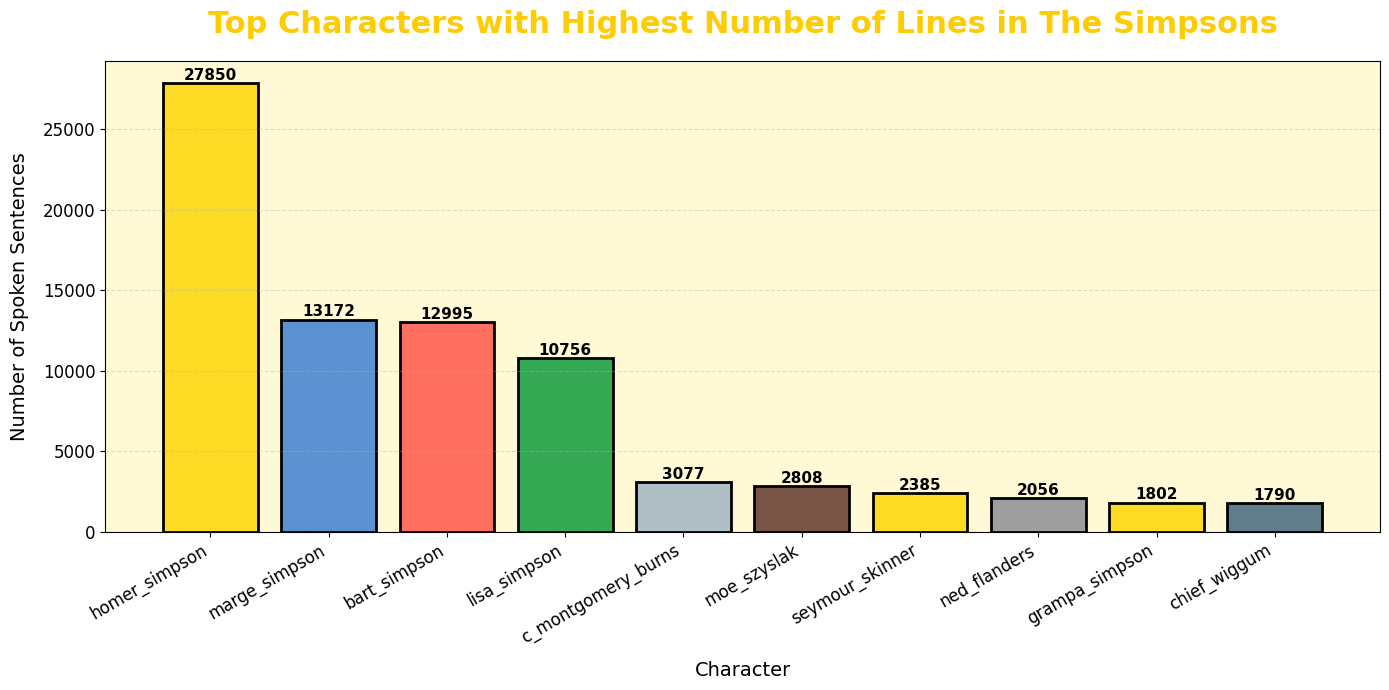

In [ ]:
top_characters_by_lines(df_eda)

In [ ]:
# Function to plot the characters with the highest word counts
def top_characters_by_words(df):
    # Total number of words spoken by each character
    word_count_by_character = df.groupby('character_normalized')['word_count'].sum()
    top_15_characters = word_count_by_character.sort_values(ascending=False).head(10)

    character_names = top_15_characters.index
    counts = top_15_characters.values

    colors = [character_colors.get(name, "#fdda24") for name in character_names]

    plt.figure(figsize=(14, 7))
    bars = plt.bar(character_names, counts, color=colors, edgecolor='black', linewidth=2)

    ax = plt.gca()
    ax.set_facecolor('#fff9d5')

    plt.title("Top Characters by Word Count", fontsize=22, weight='bold', color='#ffcc00', pad=20)
    plt.xlabel("Character", fontsize=14)
    plt.ylabel("Words Spoken", fontsize=14)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f"{int(yval)}",
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

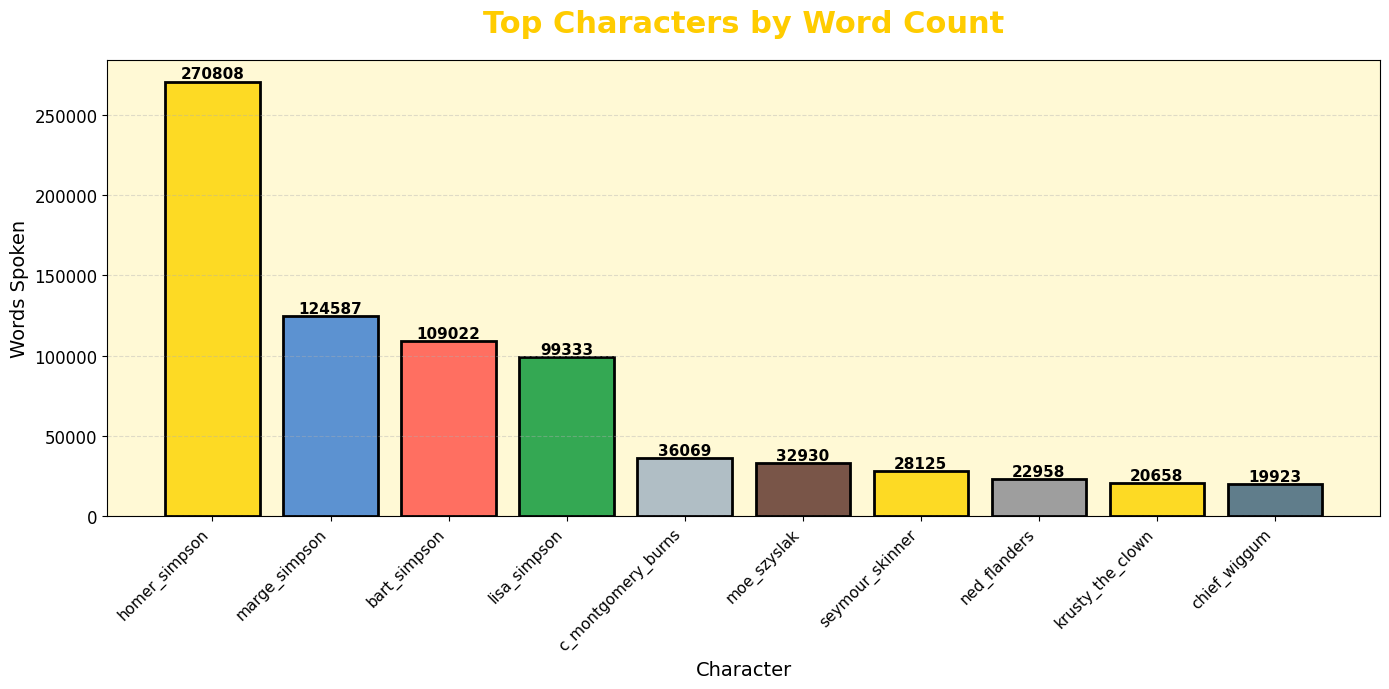

In [ ]:
top_characters_by_words(df_eda)

In [ ]:
def lexical_diversity_analysis(df, min_words=50):
    def lexical_diversity(text):
        words = word_tokenize(text.lower())
        words = [w for w in words if w.isalpha()]
        return len(set(words)) / len(words) if words else 0

    # Total number of words spoken by each character
    total_words_by_char = df.groupby('character_normalized')['spoken_words'].apply(lambda x: len(' '.join(x.dropna()).split()))

    # Keep only characters who have spoken at least min_words words
    eligible_characters = total_words_by_char[total_words_by_char >= min_words].index

    # Compute lexical diversity for these characters only.
    diversity_by_char = df[df['character_normalized'].isin(eligible_characters)] \
        .groupby('character_normalized')['spoken_words'] \
        .apply(lambda x: lexical_diversity(' '.join(x.dropna()))) \
        .sort_values(ascending=True) \
        .tail(10)

    # Plot
    diversity_by_char.plot(kind='barh', title='Top Characters by Lexical Diversity', color=character_colors.get('milhouse_van_ Houten', "#7e57c2"), edgecolor='black', linewidth=2)
    plt.gca().set_facecolor('#fff9d5')
    plt.title("Top Characters by Lexical Diversity", fontsize=22, fontweight='bold', color="#ffcc00", pad=20)
    plt.xlabel("Lexical Diversity", fontsize=14, fontweight='bold', color="#ff6f61")
    plt.ylabel("Character", fontsize=14, fontweight='bold', color="#ff6f61")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

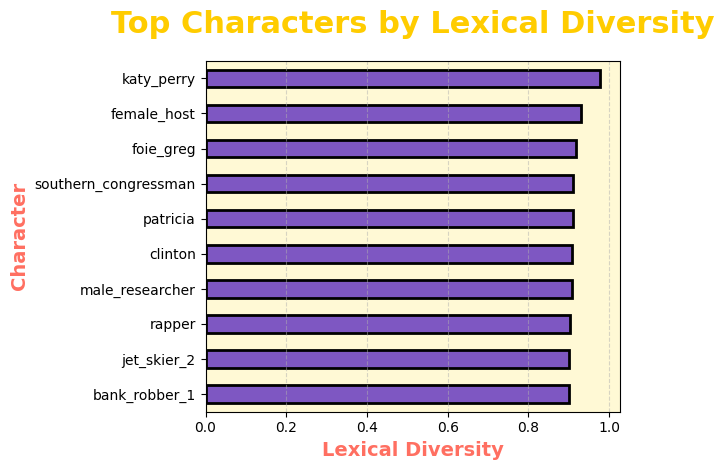

In [ ]:
lexical_diversity_analysis(df_eda)

In [ ]:
katy_perry_df = df_eda[df_eda['character_normalized'] == 'katy_perry'].reset_index(drop=True)

# Configure Pandas to display the full content without truncation
pd.set_option('display.max_colwidth', None)

# Show all words spoken by Katy Perry in the first few rows
katy_perry_df['final_text'].head()

,final_text
0,people boyfriend moes bachelor pad
1,someone totally need hug
2,thirtynine fop afopping
3,thirtyeight fishwife hawking
4,thirtyseven cooper cooping thirtysix bootblack buffing thirtyfive busker busking thirtyfour something somethings thirtythree alchemist transmuting thirtytwo dutchman plotting thirtyone doctor leeching


### Words Analysis

In [ ]:
# Feature extraction functions

def unique_word_count(text):
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalnum()]  # only alphanumeric words
    return len(set(words))

def avg_word_length(text):
    words = word_tokenize(text)
    words = [w for w in words if w.isalpha()]
    return sum(len(word) for word in words) / len(words) if words else 0

def sentence_length(text):
    return len(text)

def num_sentences(text):
    return len(sent_tokenize(text))

def num_exclamations(text):
    return text.count('!')

def num_questions(text):
    return text.count('?')

def num_stopwords(text):
    words = word_tokenize(text.lower())
    words = [w for w in words if w.isalnum()]
    return sum(1 for word in words if word in stop_words)

# Main function that applies all the sentiment features with progress bar
def apply_text_features(df, text_column='spoken_words'):

    df = progress_apply(df, unique_word_count, text_column, 'unique_word_count', "Unique Words        ", color="#fdda24", bar_width=50)
    df = progress_apply(df, avg_word_length,   text_column, 'avg_word_length',   "Average Word Length ", color="#fdda24", bar_width=50)
    df = progress_apply(df, sentence_length,   text_column, 'sentence_length',   "Sentence Length     ", color="#fdda24", bar_width=50)
    df = progress_apply(df, num_sentences,     text_column, 'num_sentences',     "Number of Sentences ", color="#fdda24", bar_width=50)
    df = progress_apply(df, num_exclamations,  text_column, 'num_exclamations',  "Exclamations        ", color="#fdda24", bar_width=50)
    df = progress_apply(df, num_questions,     text_column, 'num_questions',     "Questions           ", color="#fdda24", bar_width=50)
    df = progress_apply(df, num_stopwords,     text_column, 'num_stopwords',     "Stopwords           ", color="#fdda24", bar_width=50)

    print("\n Done!\n")
    return df

In [ ]:
# Apply text-based features to the DataFrame
df_eda = apply_text_features(df_eda)

Output()

Output()

Output()

Output()

Output()

Output()

Output()


 Done!



# Data loss

Original Rows: 158314
Clean Rows: 131853
Lost Rows: 26461


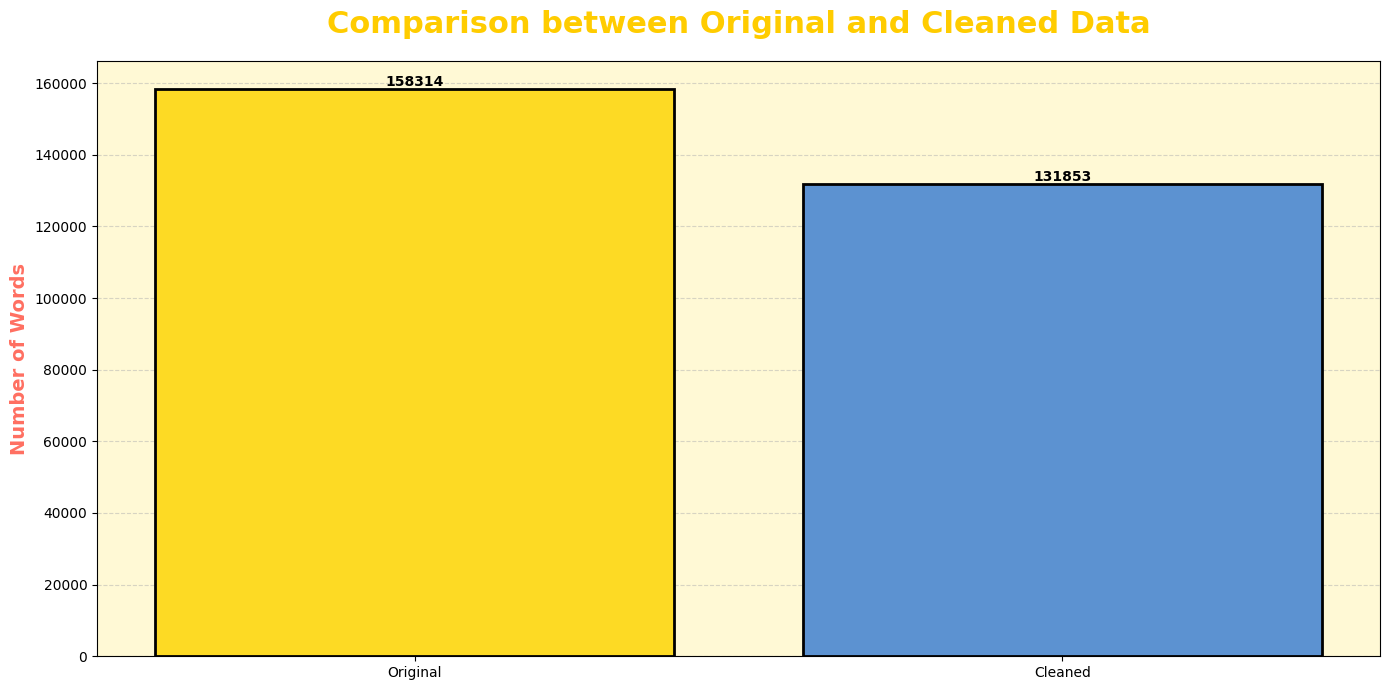

In [ ]:
# Count number of total rows between original df and cleaned one
original_count = df.shape[0]
cleaned_count = df_full.shape[0]
lost_rows = original_count - cleaned_count

print(f"Original Rows: {original_count}")
print(f"Clean Rows: {cleaned_count}")
print(f"Lost Rows: {lost_rows}")

# Bar plot for Original vs Cleaned comparison
plt.figure(figsize=(14, 7))
bars = plt.bar(['Original', 'Cleaned'], [original_count, cleaned_count],
               color=[character_colors.get('homer_simpson', "#fdda24"), character_colors.get('marge_simpson', "#5c92d1")],
               edgecolor='black', linewidth=2, zorder=2)
plt.gca().set_facecolor('#fff9d5')
plt.title('Comparison between Original and Cleaned Data', fontsize=22, weight='bold', color='#ffcc00', pad=20)
plt.ylabel('Number of Words', fontsize=14, fontweight='bold', color='#ff6f61')
plt.xlabel('', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f"{int(yval)}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)
plt.tight_layout()

plt.show()

In [ ]:
# Count the number of lost characters
characters_original = df['character'].dropna().str.lower().str.strip().nunique()
characters_cleaned = df_full['character_normalized'].nunique()
characters_lost = characters_original - characters_cleaned

print(f"Number of original characters: {characters_original}")
print(f"Number of unique characters after cleaning: {characters_cleaned}")
print(f"Lost characters: {characters_lost}")


Number of original characters: 6753
Number of unique characters after cleaning: 6257
Lost characters: 496


Total words in original dataset: 1306321
Total words after preprocessing: 761723
Words lost during preprocessing: 544598
Percentage of words lost: 41.69%


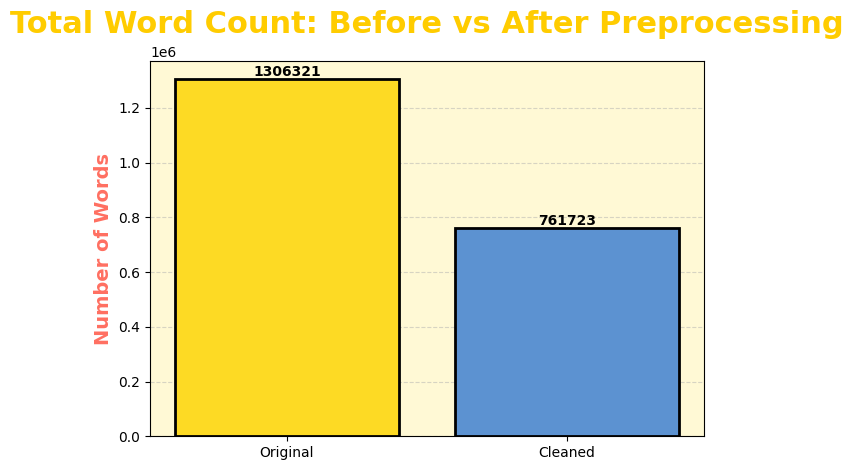

In [ ]:
# Total number of words in the original dataset
total_words_original = df['spoken_words'].dropna().apply(lambda x: len(x.split())).sum()
# Total number of words in the cleaned/preprocessed dataset
total_words_cleaned = df_full['final_text'].dropna().apply(lambda x: len(x.split())).sum()

# Word loss
lost_words = total_words_original - total_words_cleaned
loss_percentage = (lost_words / total_words_original) * 100

print(f"Total words in original dataset: {total_words_original}")
print(f"Total words after preprocessing: {total_words_cleaned}")
print(f"Words lost during preprocessing: {lost_words}")
print(f"Percentage of words lost: {loss_percentage:.2f}%")

bars = plt.bar(['Original', 'Cleaned'], [total_words_original, total_words_cleaned],
        color=[character_colors.get('homer_simpson', "#fdda24"),
               character_colors.get('marge_simpson', "#5c92d1")]
        , edgecolor='black', linewidth=2, zorder=2)
plt.gca().set_facecolor('#fff9d5')
plt.title('Total Word Count: Before vs After Preprocessing', fontsize=22, weight='bold', color='#ffcc00', pad=20)
plt.ylabel('Number of Words', fontsize=14, fontweight='bold', color='#ff6f61')
plt.xlabel('', fontsize=14)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, f"{int(yval)}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)
plt.tight_layout()
plt.show()

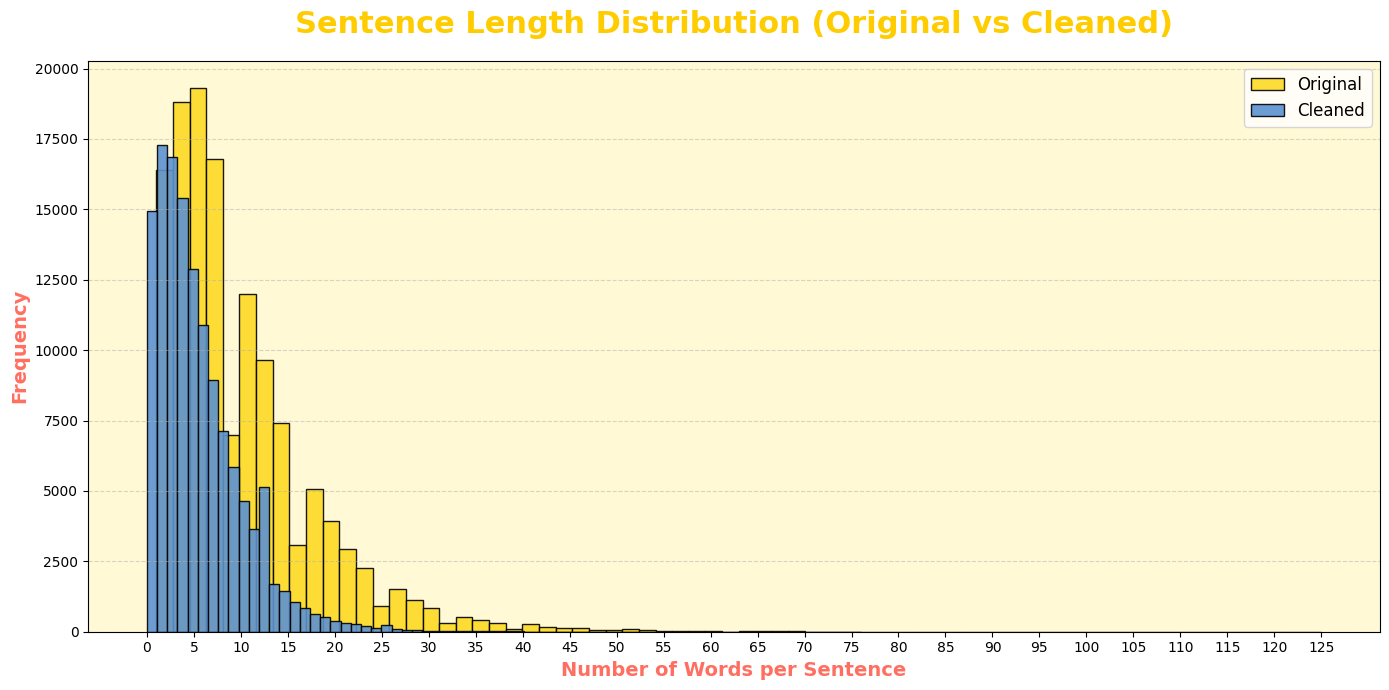

In [ ]:
# Sentence length (word count) before preprocessing
df['sentence_length_original'] = df['spoken_words'].dropna().apply(lambda x: len(x.split()))
# Sentence length (word count) after preprocessing
df_full['sentence_length_cleaned'] = df_full['final_text'].dropna().apply(lambda x: len(x.split()))

plt.figure(figsize=(14, 7))

# Histogram for original sentence lengths
plt.hist(df['sentence_length_original'].dropna(), bins=70, color=character_colors.get('homer_simpson', "#fdda24"), edgecolor='black', alpha=0.9, label='Original')
# Histogram for cleaned sentence lengths
plt.hist(df_full['sentence_length_cleaned'].dropna(), bins=70, color=character_colors.get('marge_simpson', "#5c92d1"), edgecolor='black', alpha=0.9, label='Cleaned')

plt.title("Sentence Length Distribution (Original vs Cleaned)", fontsize=22, fontweight='bold', color="#ffcc00", pad=20)
plt.xlabel("Number of Words per Sentence", fontsize=14, fontweight='bold', color="#ff6f61")
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color="#ff6f61")
plt.legend(fontsize=12, loc='upper right')
plt.gca().set_facecolor('#fff9d5')
max_length = max(df['sentence_length_original'].max(), df_full['sentence_length_cleaned'].max())
plt.xticks(np.arange(0, max_length + 5, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=1)
plt.tight_layout()
plt.show()

# Dataset saving to csv

In [ ]:
# Saves df_cleaned to the same directory as the input file
df_eda.to_csv("/content/gdrive/MyDrive/TextMiningProject/df_eda.csv", index=False)